In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import watermark
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
%reload_ext watermark
%watermark -a "Matheus Francelino"

Author: Matheus Francelino



In [3]:
dataset_completo = pd.read_csv('essay-br/essay-br.csv')

In [4]:
train = pd.read_csv('essay-br/splits/training.csv')

In [5]:
valid = pd.read_csv('essay-br/splits/development.csv')

In [6]:
test = pd.read_csv('essay-br/splits/testing.csv')

In [7]:
contextualizacao = pd.read_csv('essay-br/prompts.csv')

In [8]:
dataset_completo.head(5)

,prompt,title,essay,competence,score
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0


In [9]:
dataset_completo.shape

(4570, 5)

In [10]:
train.head(5)

,prompt,title,essay,competence,score
0,60,Reforma da previdência,['É notório que a reforma da previdência no Br...,"[120, 80, 80, 120, 40]",440
1,51,ANALFABETISMO E SOCIEDADE,['Pode -se afirmar que a presença dos Jesuítas...,"[120, 120, 80, 80, 80]",480
2,73,Caminhos para superar os desafios encontrados ...,['Em 13 de maio de 1888 veio ao Brasil a lei d...,"[120, 80, 80, 80, 80]",440
3,51,Analfabetismo funcional no Brasil tem solução.,['“Uma sociedade só progride quando um se mobi...,"[120, 160, 120, 120, 120]",640
4,59,NaN,"['Nas últimas décadas, o Brasil vem enfrentand...","[120, 120, 80, 120, 120]",560


In [11]:
train.shape

(3198, 5)

In [12]:
valid.head(5)

,prompt,title,essay,competence,score
0,63,NaN,['Muito se exige da natureza para a produção e...,"[120, 160, 120, 160, 80]",640
1,74,Quando isso irá acabar?,['No Brasil atual\xa0 algo que infelizmente ac...,"[120, 80, 80, 80, 40]",400
2,74,NaN,"['Na Grécia antiga, houve um momento de forte ...","[160, 160, 120, 160, 160]",760
3,58,Qual floresta queremos para o futuro?,['Muito tem se falado nos noticiários à respei...,"[120, 80, 80, 120, 40]",440
4,74,NaN,"['Segundo Aristóteles, toda organização social...","[160, 120, 160, 160, 120]",720


In [13]:
valid.shape

(686, 5)

In [14]:
test.head(5)

,prompt,title,essay,competence,score
0,68,A importância da cultura,['Temos no mundo todo materiais de grande impo...,"[120, 120, 80, 80, 0]",400
1,26,Todos nós sabemos que é impossível melhorar a ...,['Todos nós sabemos que é impossível melhorar ...,"[120, 120, 120, 120, 120]",600
2,22,Prerrogativa de função ou privilégio pessoal,"['Recentemente, a pauta do foro especial por p...","[200, 200, 200, 200, 0]",800
3,54,Movimento antivacina e a volta das doenças err...,['O movimento antivacina vem acontecendo no mu...,"[80, 120, 80, 120, 80]",480
4,59,A fome como resultado da ignorância humana no ...,['Vários momentos da História destacam situaçõ...,"[120, 160, 120, 120, 120]",640


In [15]:
test.shape

(686, 5)

In [16]:
contextualizacao.sample(5)

,id,description
41,41,['Os colégios militares de vários Estados do B...
75,75,"""A maioria dos brasileiros segue contrária à a..."
46,46,Privatização é um processo da concessão ou ven...
63,63,Segundo a resolução Conama Nº001 de janeiro de...
35,35,"['Se você é um estudante ""antenado"", deve esta..."


In [17]:
dataset_completo.describe()

,prompt,score
count,4570.000000,4570.000000
mean,55.420788,614.030635
std,20.940869,176.878132
min,0.000000,0.000000
25%,45.000000,520.000000
50%,56.000000,600.000000
75%,73.000000,720.000000
max,85.000000,1000.000000


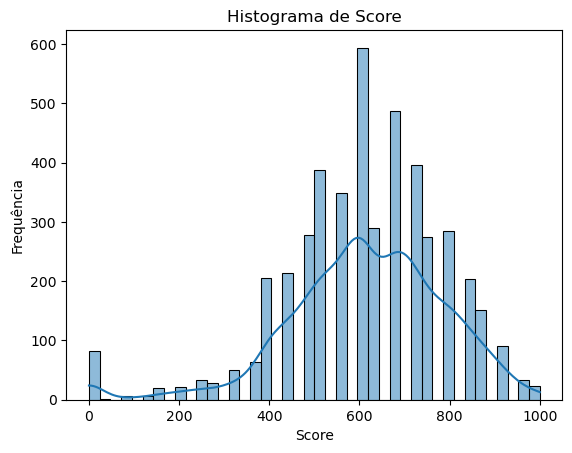

In [18]:
# Criar o histograma
sns.histplot(dataset_completo['score'], kde=True)

# Exibir o gráfico
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.title('Histograma de Score')
plt.show()

In [19]:
dataset_completo['score'].describe()

count    4570.000000
mean      614.030635
std       176.878132
min         0.000000
25%       520.000000
50%       600.000000
75%       720.000000
max      1000.000000
Name: score, dtype: float64

#### Posteriormente precisaremos analisar essas notas 0. Porque são 0? Podemos excluí-las do dataset?

In [20]:
dataset_completo['Total_Caracteres'] = dataset_completo.essay.apply(lambda x: len(x))

In [21]:
dataset_completo['Total_Caracteres'].describe()

count    4570.000000
mean     1842.679650
std       533.123926
min       455.000000
25%      1460.000000
50%      1824.000000
75%      2216.000000
max      5189.000000
Name: Total_Caracteres, dtype: float64

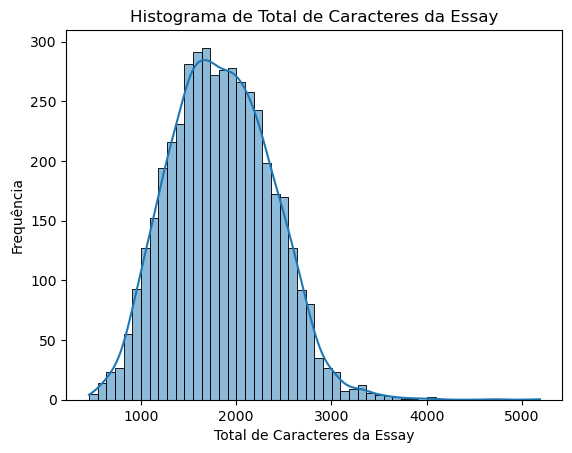

In [22]:
# Criar o histograma
sns.histplot(dataset_completo['Total_Caracteres'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Caracteres da Essay')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Caracteres da Essay')
plt.show()


In [23]:
dataset_completo['Total_Caracteres'].describe()

count    4570.000000
mean     1842.679650
std       533.123926
min       455.000000
25%      1460.000000
50%      1824.000000
75%      2216.000000
max      5189.000000
Name: Total_Caracteres, dtype: float64

#### Claramente temos alguns outliers, precisamos trata-los

In [24]:
dataset_completo['competence'] = dataset_completo['competence'].apply(lambda x: x.replace("'",""))

In [25]:
dataset_completo['competence'] = dataset_completo['competence'].apply(lambda x: x.replace("[",""))

In [26]:
dataset_completo['competence'] = dataset_completo['competence'].apply(lambda x: x.replace("]",""))

In [27]:
dataset_completo['competence'] = dataset_completo['competence'].apply(lambda x: x.replace(" ",""))

In [28]:
dataset_completo['competence'] = dataset_completo['competence'].apply(lambda x: x.split(','))

In [29]:
dataset_completo['competence'].tolist()

[['160', '160', '120', '120', '120'],
 ['160', '160', '120', '120', '120'],
 ['120', '160', '160', '160', '120'],
 ['120', '120', '80', '120', '120'],
 ['0', '0', '0', '0', '0'],
 ['80', '80', '80', '80', '0'],
 ['0', '80', '0', '0', '0'],
 ['200', '160', '160', '200', '120'],
 ['160', '160', '120', '160', '120'],
 ['0', '0', '0', '0', '0'],
 ['120', '80', '120', '120', '0'],
 ['120', '120', '80', '80', '80'],
 ['40', '40', '40', '40', '40'],
 ['0', '0', '0', '0', '0'],
 ['80', '80', '80', '80', '80'],
 ['120', '120', '80', '80', '120'],
 ['200', '200', '200', '200', '200'],
 ['160', '200', '160', '200', '200'],
 ['80', '120', '80', '120', '80'],
 ['120', '200', '160', '160', '160'],
 ['120', '120', '120', '80', '80'],
 ['120', '80', '120', '120', '120'],
 ['120', '120', '120', '120', '120'],
 ['120', '120', '120', '120', '120'],
 ['200', '200', '200', '160', '120'],
 ['120', '120', '120', '120', '80'],
 ['120', '120', '80', '80', '80'],
 ['80', '120', '80', '80', '0'],
 ['80', '80', '

### A fonte dos dados não especifica quais são as ordens de competencia.
> Exemplo: primeira competencia é a Lingua Portuguesa, segunda competencia é Tema e Gênero

> #### Vamos assumir que os componentes são:
> - Primeiro componente: Lingua Portuguesa
> - Segundo componente: Tema e Gênero
> - Terceiro componente: Coerência
> - Quarto componente: Coesâo
> - Quinto componente: Proposta de Intervenção

In [30]:
# Expandindo a coluna de listas em múltiplas colunas 
df_expanded = pd.DataFrame(dataset_completo['competence'].tolist(), index=dataset_completo.index, columns=['LinguaPortuguesa', 'TemaGenero', 'Coerencia', 'Coesao', 'PropostaIntervencao']) 

In [31]:
df_expanded.sample(5)

,LinguaPortuguesa,TemaGenero,Coerencia,Coesao,PropostaIntervencao
1808,120,80,120,120,120
1445,160,120,160,120,160
4469,160,160,120,120,120
220,120,120,80,120,120
1030,120,120,120,120,120


In [32]:
# Concatenando com o DataFrame original (opcional) 
dataset_completo = pd.concat([dataset_completo, df_expanded], axis=1)

In [33]:
dataset_completo.head(5)

,prompt,title,essay,competence,score,Total_Caracteres,LinguaPortuguesa,TemaGenero,Coerencia,Coesao,PropostaIntervencao
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680,2216,160,160,120,120,120
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680,1449,160,160,120,120,120
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720,2595,120,160,160,160,120
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560,1417,120,120,80,120,120
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0,1309,0,0,0,0,0


In [34]:
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   prompt               4570 non-null   int64 
 1   title                3886 non-null   object
 2   essay                4570 non-null   object
 3   competence           4570 non-null   object
 4   score                4570 non-null   int64 
 5   Total_Caracteres     4570 non-null   int64 
 6   LinguaPortuguesa     4570 non-null   object
 7   TemaGenero           4570 non-null   object
 8   Coerencia            4570 non-null   object
 9   Coesao               4570 non-null   object
 10  PropostaIntervencao  4570 non-null   object
dtypes: int64(3), object(8)
memory usage: 392.9+ KB


In [35]:
dataset_completo[['LinguaPortuguesa','TemaGenero','Coerencia','Coesao','PropostaIntervencao']] = dataset_completo[['LinguaPortuguesa','TemaGenero','Coerencia','Coesao','PropostaIntervencao']].astype('int64')

In [36]:
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   prompt               4570 non-null   int64 
 1   title                3886 non-null   object
 2   essay                4570 non-null   object
 3   competence           4570 non-null   object
 4   score                4570 non-null   int64 
 5   Total_Caracteres     4570 non-null   int64 
 6   LinguaPortuguesa     4570 non-null   int64 
 7   TemaGenero           4570 non-null   int64 
 8   Coerencia            4570 non-null   int64 
 9   Coesao               4570 non-null   int64 
 10  PropostaIntervencao  4570 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 392.9+ KB


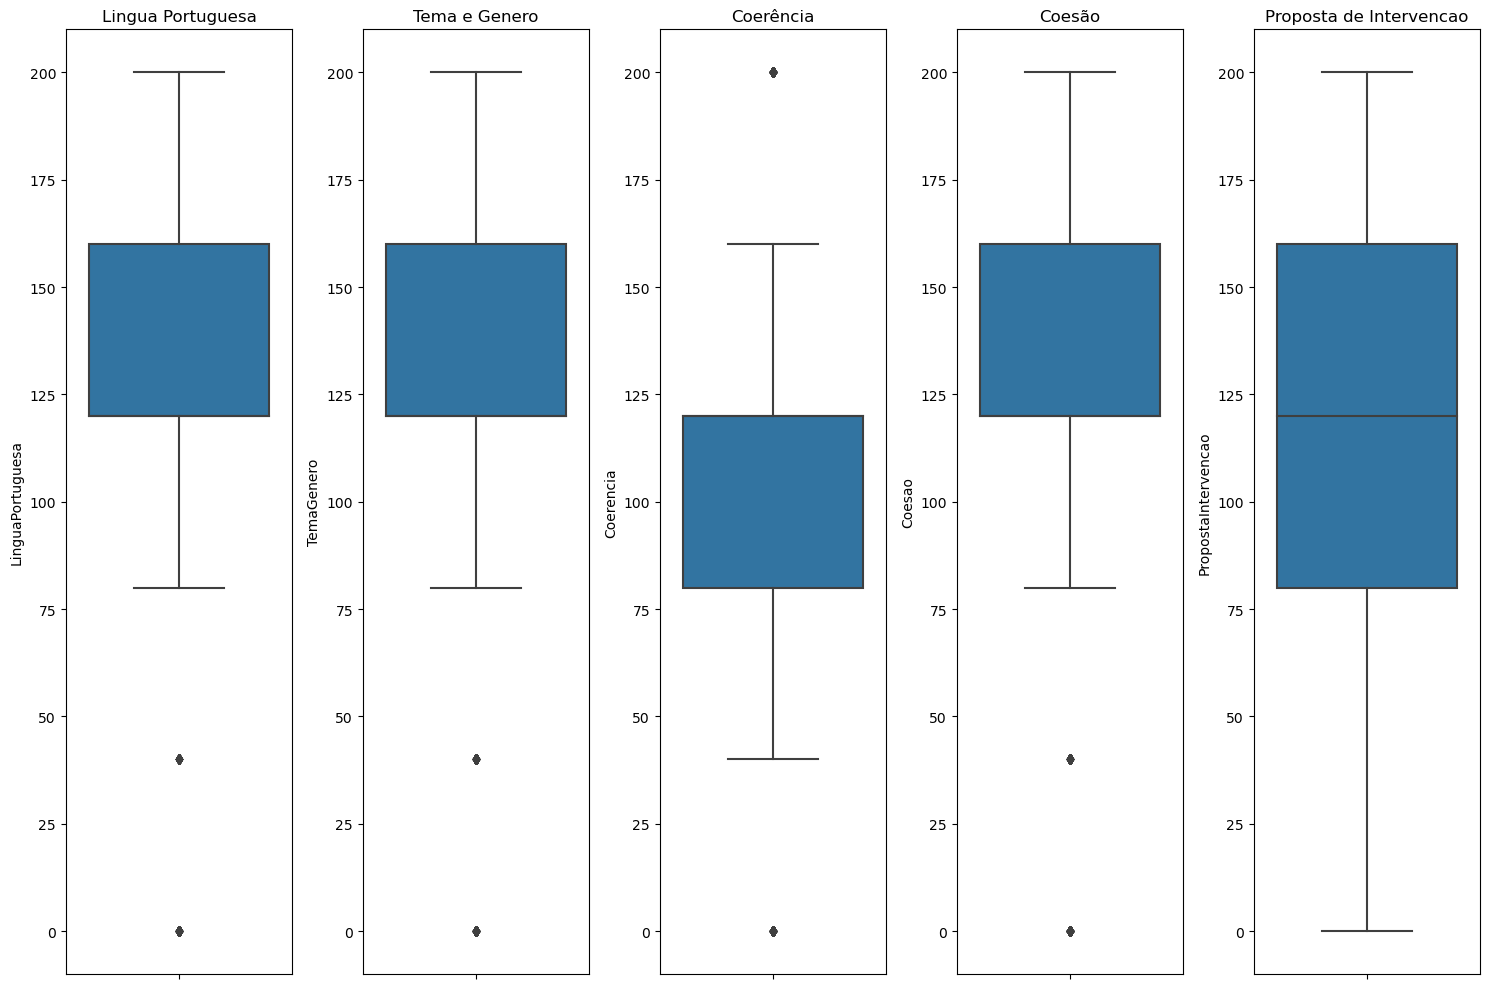

In [37]:
# Criar os subplots
fig, axes = plt.subplots(ncols=5, figsize=(15, 10))

# Adicionar box plots a cada subplot
sns.boxplot(y=dataset_completo['LinguaPortuguesa'], ax=axes[0]).set_title('Lingua Portuguesa')
sns.boxplot(y=dataset_completo['TemaGenero'], ax=axes[1]).set_title('Tema e Genero')
sns.boxplot(y=dataset_completo['Coerencia'], ax=axes[2]).set_title('Coerência')
sns.boxplot(y=dataset_completo['Coesao'], ax=axes[3]).set_title('Coesão')
sns.boxplot(y=dataset_completo['PropostaIntervencao'], ax=axes[4]).set_title('Proposta de Intervencao')

# Ajustar layout
plt.tight_layout()
plt.show()


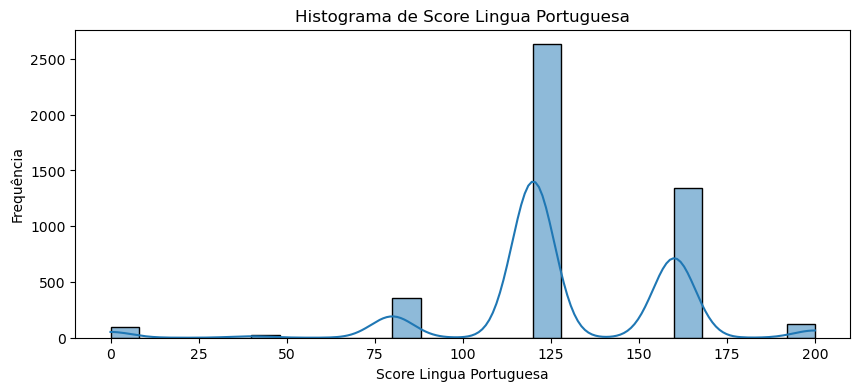

In [38]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_completo['LinguaPortuguesa'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Lingua Portuguesa')
plt.ylabel('Frequência')
plt.title('Histograma de Score Lingua Portuguesa')
plt.show()

In [39]:
dataset_completo['LinguaPortuguesa'].describe()

count    4570.000000
mean      127.737418
std        32.320365
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: LinguaPortuguesa, dtype: float64

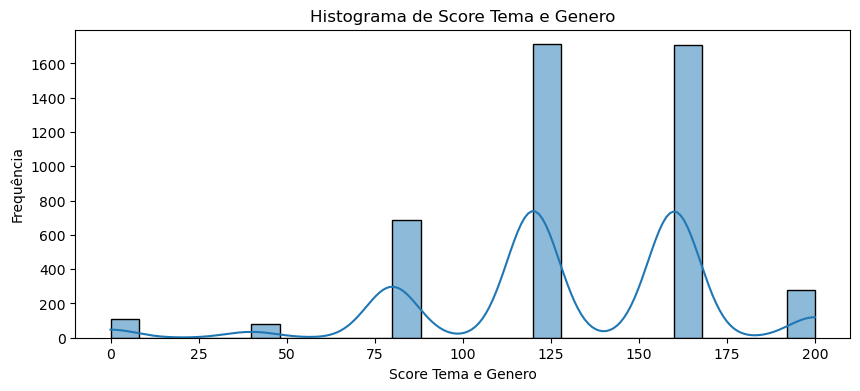

In [40]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_completo['TemaGenero'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Tema e Genero')
plt.ylabel('Frequência')
plt.title('Histograma de Score Tema e Genero')
plt.show()

In [41]:
dataset_completo['TemaGenero'].describe()

count    4570.000000
mean      129.496718
std        39.879010
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: TemaGenero, dtype: float64

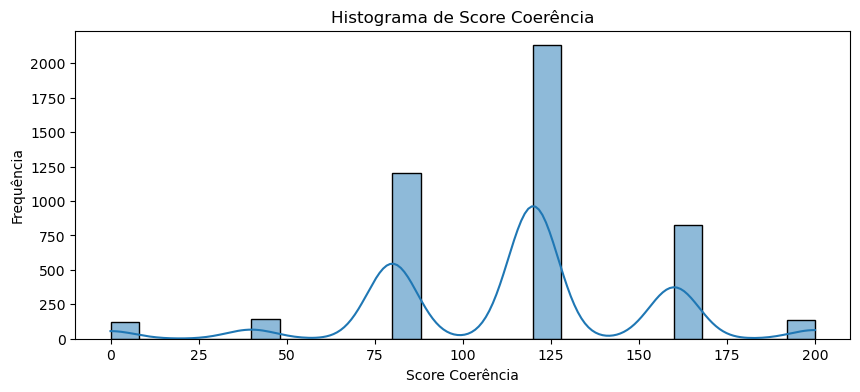

In [42]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_completo['Coerencia'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Coerência')
plt.ylabel('Frequência')
plt.title('Histograma de Score Coerência')
plt.show()

In [43]:
dataset_completo['Coerencia'].describe()

count    4570.000000
mean      113.356674
std        38.098571
min         0.000000
25%        80.000000
50%       120.000000
75%       120.000000
max       200.000000
Name: Coerencia, dtype: float64

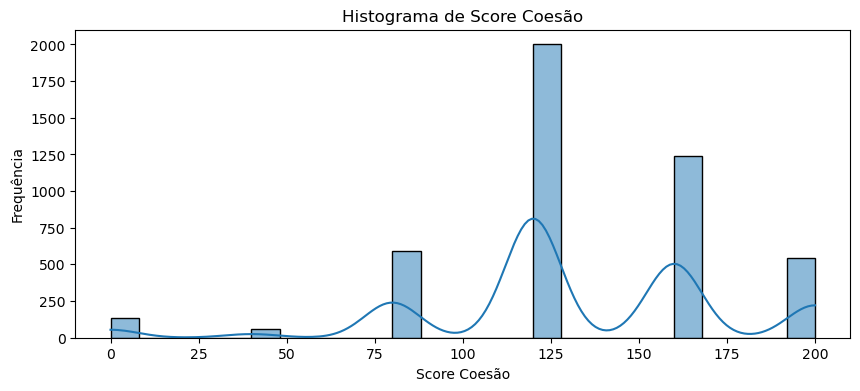

In [44]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_completo['Coesao'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Coesão')
plt.ylabel('Frequência')
plt.title('Histograma de Score Coesão')
plt.show()

In [45]:
dataset_completo['Coesao'].describe()

count    4570.000000
mean      130.634573
std        42.401018
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: Coesao, dtype: float64

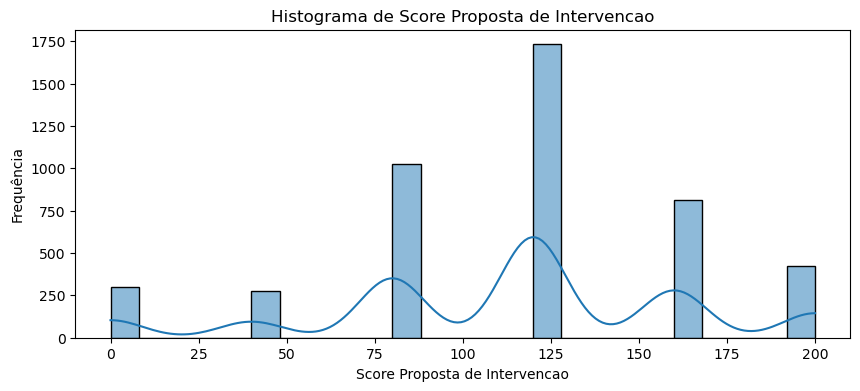

In [46]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_completo['PropostaIntervencao'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Proposta de Intervencao')
plt.ylabel('Frequência')
plt.title('Histograma de Score Proposta de Intervencao')
plt.show()

In [47]:
dataset_completo['PropostaIntervencao'].describe()

count    4570.000000
mean      112.805252
std        50.213457
min         0.000000
25%        80.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: PropostaIntervencao, dtype: float64

In [48]:
dataset_completo.title.isna().sum()

684

In [49]:
dataset_completo.title = dataset_completo.title.fillna(' ')

In [50]:
len(dataset_completo.title)

4570

In [51]:
dataset_completo['Total_Caracteres_Titulo'] = dataset_completo.title.apply(lambda x: len(x))

In [52]:
dataset_completo.head(5)

,prompt,title,essay,competence,score,Total_Caracteres,LinguaPortuguesa,TemaGenero,Coerencia,Coesao,PropostaIntervencao,Total_Caracteres_Titulo
0,21,A greve dos caminhoneiros e a malha ferroviária,['A grande importância dos caminhoneiros para ...,"[160, 160, 120, 120, 120]",680,2216,160,160,120,120,120,47
1,23,"Vossa excelência Senador M. M.,",['O senhor e eu já estamos cientes do projeto ...,"[160, 160, 120, 120, 120]",680,1449,160,160,120,120,120,32
2,39,A validade do impeachment,['É de conhecimento geral dos brasileiros o qu...,"[120, 160, 160, 160, 120]",720,2595,120,160,160,160,120,25
3,26,Podemos perceber que a sociedade brasileira,['Podemos perceber que a sociedade brasileira ...,"[120, 120, 80, 120, 120]",560,1417,120,120,80,120,120,43
4,4,Comenta-se que o ex-presidente Lula,['Comenta-se que o ex presidente Lula ex-presi...,"[0, 0, 0, 0, 0]",0,1309,0,0,0,0,0,35


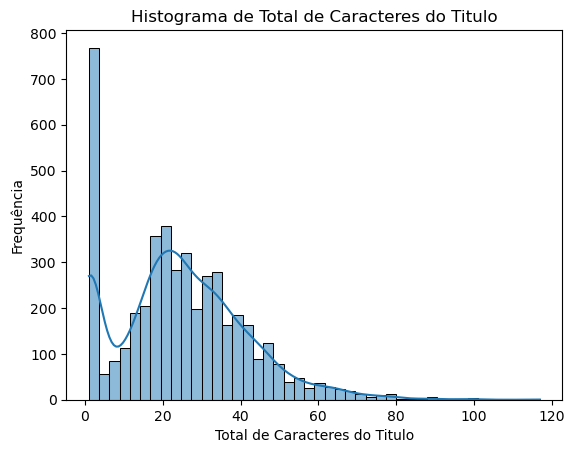

In [53]:
# Criar o histograma
sns.histplot(dataset_completo['Total_Caracteres_Titulo'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Caracteres do Titulo')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Caracteres do Titulo')
plt.show()


In [54]:
df_prompt = pd.DataFrame(dataset_completo['prompt'].value_counts()).reset_index()

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
df_prompt.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
prompt,83,84,82,51,50,52,47,48,54,43,49,46,45,44,58,78,55,59,56,62,63,85,73,70,81,60,76,71,75,74,69,72,57,64,68,79,65,80,77,61,66,18,8,40,16,6,15,3,11,1,10,21,4,13,9,2,23,22,20,0,14,5,12,19,38,41,7,39,42,29,17,24,67,53,34,27,28,37,30,25,33,36,26,31,32,35
count,151,148,127,121,120,120,119,118,118,118,118,118,117,113,112,110,109,105,100,97,95,92,91,90,86,83,82,78,77,77,72,70,63,61,56,54,41,34,33,22,22,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,19,19,19,19,19,19,18,18,17,17,17,16,16,16,16,16,16,16,16,16,16,16,15


In [57]:
x = df_prompt.prompt.to_list()

In [58]:
y = df_prompt['count'].to_list()

In [59]:
x = np.array(x)

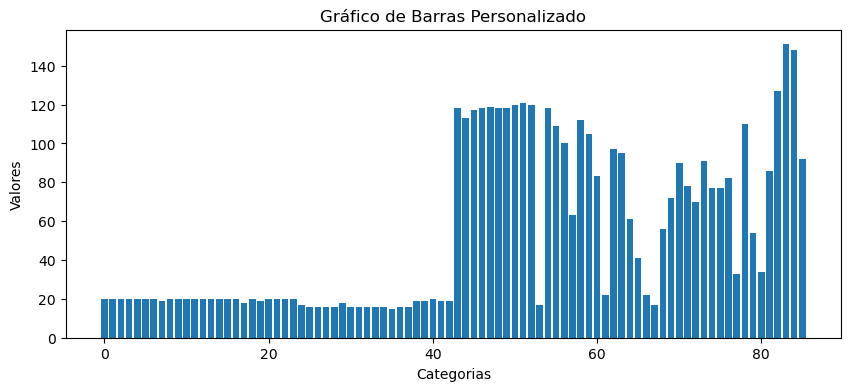

In [60]:
# Criando o gráfico de barras com cores personalizadas
plt.figure(figsize=(10, 4))

plt.bar(x, y)

# Adicionando título e rótulos
plt.title('Gráfico de Barras Personalizado')
plt.xlabel('Categorias')
plt.ylabel('Valores')

# Exibindo o gráfico
plt.show()


In [61]:
text = contextualizacao.query("id == 83").description

In [62]:
text.iloc[0]

'"O homem moderno vem deixando de lado as práticas esportivas, o que muitas vezes leva a um estilo de vida sedentário e provoca distúrbios como má alimentação, obesidade, tabagismo, estresse, doenças coronarianas etc. Como reação a essa atitude, a ciência do esporte vem desenvolvendo estudos e demonstrando a importância que a prática constante de uma atividade física bem planejada tem para que as pessoas possam ter uma vida mais saudável". [Brasil Escola - leia na íntegra]\n"Todas as pessoas necessitam de atividades para o desenvolvimento. Mas, na fase da infância, é quase essencial praticar exercícios. "Os esportes podem ajudar na coordenação, evitar lesões e ainda colaborar no aspecto social durante esta fase", explicou o preparador físico Aulus Sellmer. [Estadão - Leia e ouça na íntegra]\n"A UNESCO sempre trabalhou o esporte e a educação física como instrumentos importantes para a formação de valores, a socialização e o desenvolvimento humano. Uma vez que o ato constitutivo da UNESC

In [63]:
dataset_completo['essay'] = dataset_completo['essay'].apply(lambda x: x.replace("[",""))

In [64]:
dataset_completo['essay'] = dataset_completo['essay'].apply(lambda x: x.replace("]",""))

In [65]:
dataset_completo['Quantidade_Palavras'] = dataset_completo['essay'].apply(lambda x: len(x.split(' ')))

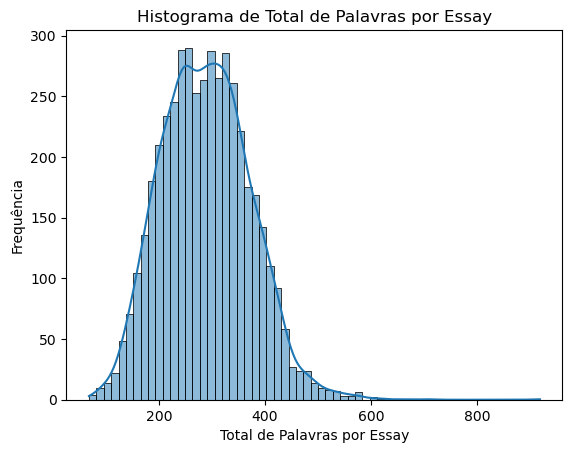

In [66]:
# Criar o histograma
sns.histplot(dataset_completo['Quantidade_Palavras'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Palavras por Essay')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Palavras por Essay')
plt.show()

In [67]:
dataset_completo['Quantidade_Palavras'].describe()

count    4570.000000
mean      288.608315
std        83.318412
min        68.000000
25%       228.000000
50%       286.000000
75%       344.000000
max       918.000000
Name: Quantidade_Palavras, dtype: float64

In [68]:
dataset_completo['Quantidade_Palavras_Titulo'] = dataset_completo['title'].apply(lambda x: len(x.split(' ')))

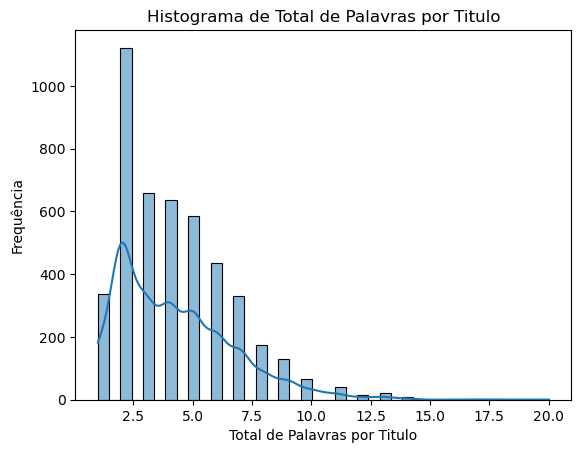

In [69]:
# Criar o histograma
sns.histplot(dataset_completo['Quantidade_Palavras_Titulo'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Palavras por Titulo')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Palavras por Titulo')
plt.show()

### Questions
> A quantidade de caracteres influencia na qualidade do texto?

> Porque temos notas 0? 

> As notas 0 são porque houve desvio de coerência com o tema prosposto?

> Existe associação entre as competencias?

> O titulo tem influencia na nota?

> É obrigatorio ter titulo?

> O Dataset prompt são os textos de apoio?

In [70]:
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   prompt                      4570 non-null   int64 
 1   title                       4570 non-null   object
 2   essay                       4570 non-null   object
 3   competence                  4570 non-null   object
 4   score                       4570 non-null   int64 
 5   Total_Caracteres            4570 non-null   int64 
 6   LinguaPortuguesa            4570 non-null   int64 
 7   TemaGenero                  4570 non-null   int64 
 8   Coerencia                   4570 non-null   int64 
 9   Coesao                      4570 non-null   int64 
 10  PropostaIntervencao         4570 non-null   int64 
 11  Total_Caracteres_Titulo     4570 non-null   int64 
 12  Quantidade_Palavras         4570 non-null   int64 
 13  Quantidade_Palavras_Titulo  4570 non-null   int6

In [71]:
len(dataset_completo['Total_Caracteres'])

4570

In [72]:
len(dataset_completo['score'])

4570

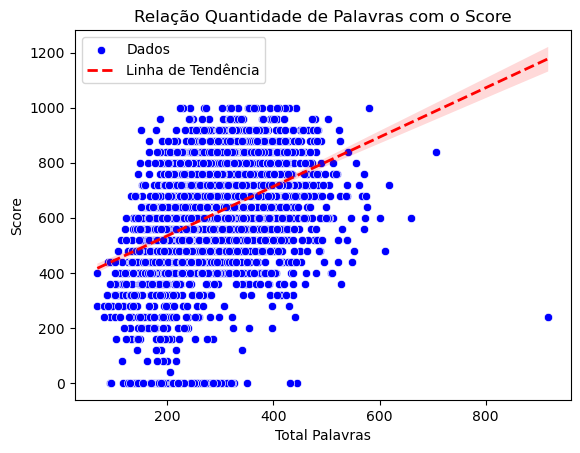

In [73]:
# Verificando há relção de quantidade de caracteres com a nota geral

sns.scatterplot(x=dataset_completo['Quantidade_Palavras'], y=dataset_completo['score'], color='blue', label='Dados')

sns.regplot(x=dataset_completo['Quantidade_Palavras'], y=dataset_completo['score'], 
            scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'}, label='Linha de Tendência') 

plt.title('Relação Quantidade de Palavras com o Score')
plt.xlabel('Total Palavras')
plt.ylabel('Score')
plt.legend()

# Exibir o gráfico
plt.show()

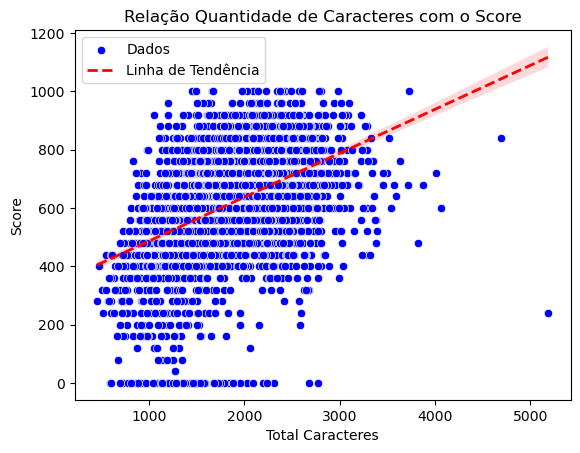

In [74]:
# Verificando há relção de quantidade de caracteres com a nota geral

sns.scatterplot(x=dataset_completo['Total_Caracteres'], y=dataset_completo['score'], color='blue', label='Dados')

sns.regplot(x=dataset_completo['Total_Caracteres'], y=dataset_completo['score'], 
            scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'}, label='Linha de Tendência') 

plt.title('Relação Quantidade de Caracteres com o Score')
plt.xlabel('Total Caracteres')
plt.ylabel('Score')
plt.legend()

# Exibir o gráfico
plt.show()

Aparentemente há uma correlação entre a quantidade de caracteres e o score, no entanto, isso pode estar sendo afetado pelos outliers e pelos valores 0 (pode ser um problema). Vamos remover os outliers e os scores nulos

In [75]:
dataset_filtrado = dataset_completo.query('score != 0')

In [76]:
# Calcular os quartis e o IQR
Q1 = dataset_filtrado['Quantidade_Palavras'].quantile(0.25)
Q3 = dataset_filtrado['Quantidade_Palavras'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover os outliers
dataset_filtrado = dataset_filtrado[(dataset_filtrado['Quantidade_Palavras'] >= limite_inferior) & (dataset_filtrado['Quantidade_Palavras'] <= limite_superior)]

In [77]:
dataset_filtrado.shape

(4456, 14)

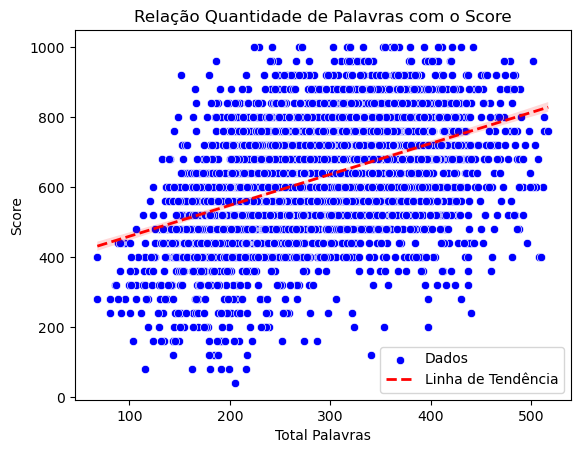

In [78]:
# Verificando há relção de quantidade de caracteres com a nota geral

sns.scatterplot(x=dataset_filtrado['Quantidade_Palavras'], y=dataset_filtrado['score'], color='blue', label='Dados')

sns.regplot(x=dataset_filtrado['Quantidade_Palavras'], y=dataset_filtrado['score'], 
            scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'}, label='Linha de Tendência') 

plt.title('Relação Quantidade de Palavras com o Score')
plt.xlabel('Total Palavras')
plt.ylabel('Score')
plt.legend()

# Exibir o gráfico
plt.show()

In [79]:
# Vamos realizar o teste estatistico de pearson para confirmar se há a relação mesmo
from scipy.stats import pearsonr

# Calculando a correlação de Pearson e o valor-p
correlacao, p_value = pearsonr(dataset_filtrado['Quantidade_Palavras'], dataset_filtrado['score'])

print(f"Correlação de Pearson: {correlacao}")
print(f"Valor-p: {p_value}")

Correlação de Pearson: 0.44672650012616993
Valor-p: 1.3639303579678787e-217


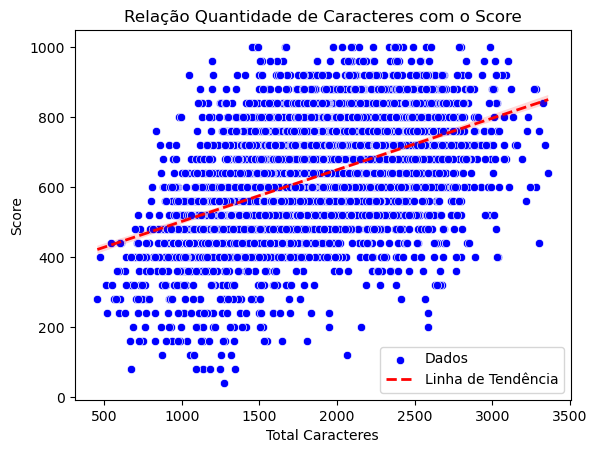

In [80]:
# Verificando há relção de quantidade de caracteres com a nota geral

sns.scatterplot(x=dataset_filtrado['Total_Caracteres'], y=dataset_filtrado['score'], color='blue', label='Dados')

sns.regplot(x=dataset_filtrado['Total_Caracteres'], y=dataset_filtrado['score'], 
            scatter=False, color='red', line_kws={'lw': 2, 'ls': '--'}, label='Linha de Tendência') 

plt.title('Relação Quantidade de Caracteres com o Score')
plt.xlabel('Total Caracteres')
plt.ylabel('Score')
plt.legend()

# Exibir o gráfico
plt.show()

In [81]:
# Vamos realizar o teste estatistico de pearson para confirmar se há a relação mesmo
from scipy.stats import pearsonr

# Calculando a correlação de Pearson e o valor-p
correlacao, p_value = pearsonr(dataset_filtrado['Total_Caracteres'], dataset_filtrado['score'])

print(f"Correlação de Pearson: {correlacao}")
print(f"Valor-p: {p_value}")

Correlação de Pearson: 0.4785928542324821
Valor-p: 6.356492961832745e-254


#### Como o valor-p é muito baixo, claramente há uma associação entre as variáveis. Podemos dizer que, estatisticamente, o número de caracteres influencia no score, Talvez seja devido a chance de que quanto mais escreve, melhor é explicado a contextualização.

In [82]:
# Verificando a correlação das competencias com o score

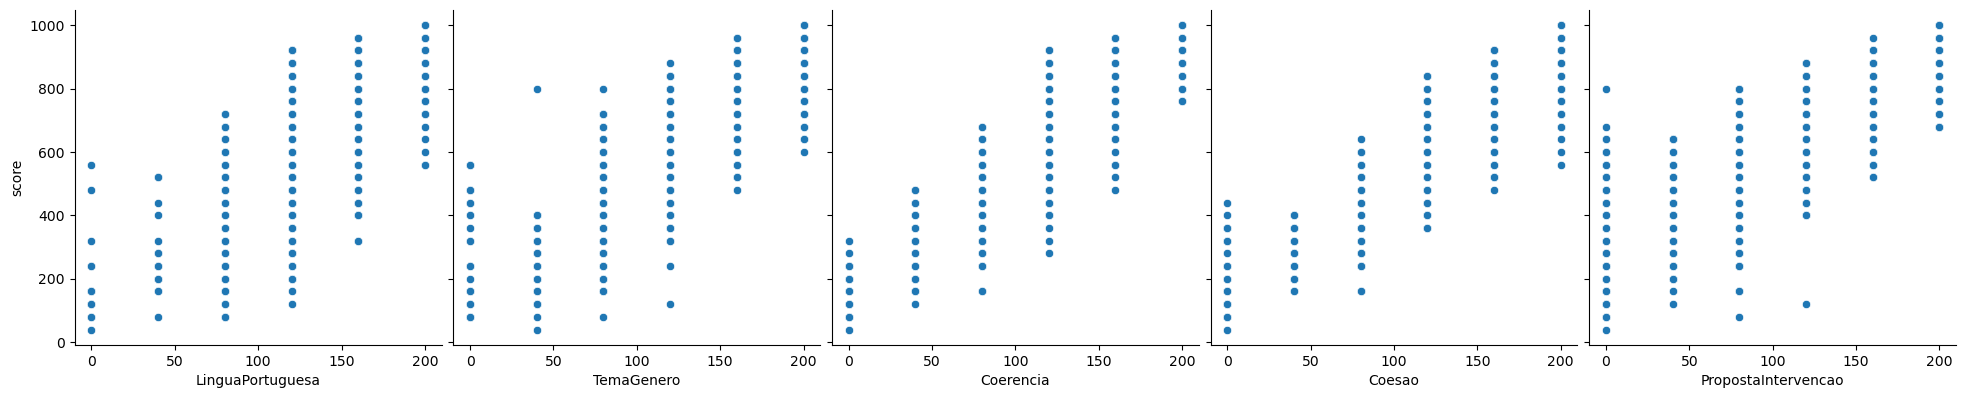

In [83]:
# Criando gráficos de dispersão para visualizar as correlações
sns.pairplot(dataset_filtrado, x_vars=['LinguaPortuguesa', 'TemaGenero', 'Coerencia', 'Coesao', 'PropostaIntervencao'], y_vars=['score'], height=4)
plt.show()

In [84]:
# Criando o DataFrame

# Calculando a correlação de todas as variáveis com a variável preditora 'y'
correlacao_com_y = dataset_filtrado[['LinguaPortuguesa', 'TemaGenero', 'Coerencia', 'Coesao', 'PropostaIntervencao', 'score']].corr()['score']

# Exibindo as correlações
print(correlacao_com_y)


LinguaPortuguesa       0.722211
TemaGenero             0.845991
Coerencia              0.881350
Coesao                 0.893548
PropostaIntervencao    0.855844
score                  1.000000
Name: score, dtype: float64


Aparentemente há correlação forte entre as variaveis de competencias e o score, o que faz sentido, quanto mais alta as competencias, maior a nota geral

In [85]:
# Correlação entre as variaveis de competencias

In [86]:
correlacao = dataset_filtrado[['LinguaPortuguesa', 'TemaGenero', 'Coerencia', 'Coesao', 'PropostaIntervencao']].corr()

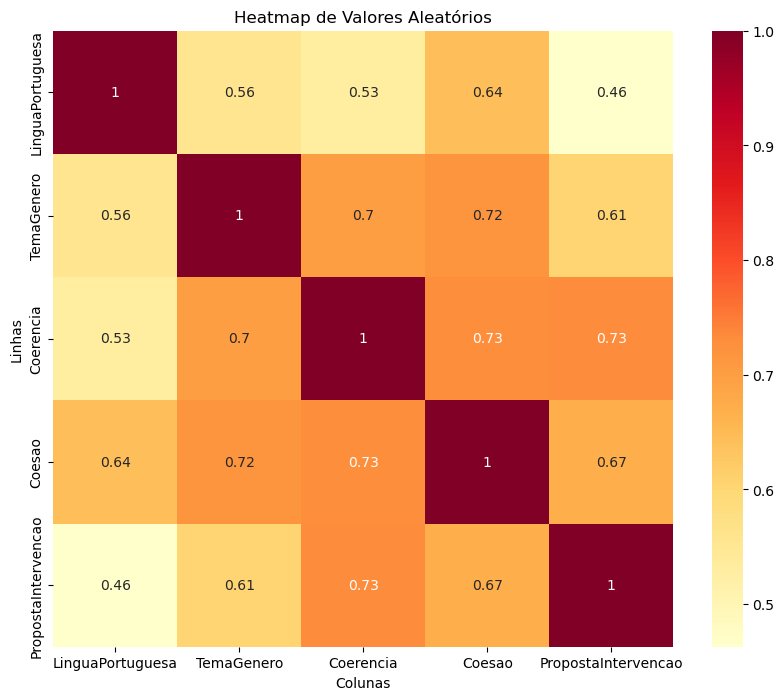

In [87]:
# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='YlOrRd')

# Adicionar título e rótulos
plt.title('Heatmap de Valores Aleatórios')
plt.xlabel('Colunas')
plt.ylabel('Linhas')

# Exibir o gráfico
plt.show()


Aparentemente todos as competencias tem relação uma com a outra.

As Variaveis são dependentes uma da outra?

In [88]:
correlacao_pearson = dataset_filtrado[['LinguaPortuguesa', 'TemaGenero']].corr(method='pearson')
print(correlacao_pearson)

                  LinguaPortuguesa  TemaGenero
LinguaPortuguesa           1.00000     0.55726
TemaGenero                 0.55726     1.00000


#### Analisando o Score e as competencias sem as observacoes com valores 0 e outliers

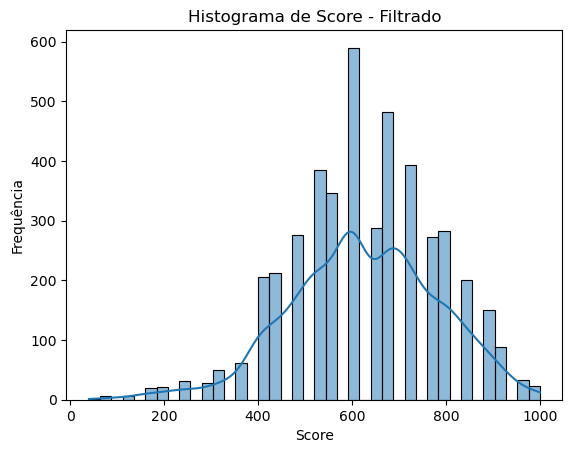

In [89]:
# Criar o histograma
sns.histplot(dataset_filtrado['score'], kde=True)

# Exibir o gráfico
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.title('Histograma de Score - Filtrado')
plt.show()

In [90]:
dataset_filtrado['score'].describe()

count    4456.000000
mean      625.134650
std       157.560043
min        40.000000
25%       520.000000
50%       600.000000
75%       720.000000
max      1000.000000
Name: score, dtype: float64

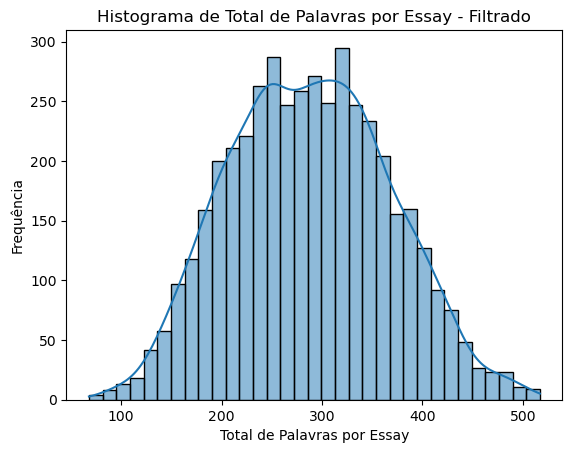

In [91]:
# Criar o histograma
sns.histplot(dataset_filtrado['Quantidade_Palavras'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Palavras por Essay')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Palavras por Essay - Filtrado')
plt.show()

In [92]:
dataset_filtrado['Quantidade_Palavras'].describe()

count    4456.000000
mean      287.801167
std        79.600126
min        68.000000
25%       229.000000
50%       287.000000
75%       344.000000
max       517.000000
Name: Quantidade_Palavras, dtype: float64

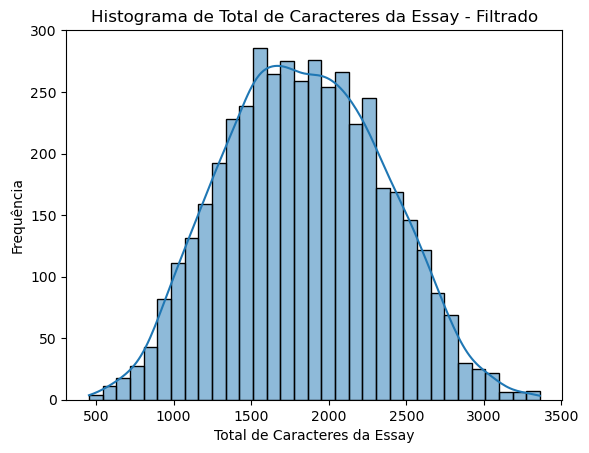

In [93]:
# Criar o histograma
sns.histplot(dataset_filtrado['Total_Caracteres'], kde=True)

# Exibir o gráfico
plt.xlabel('Total de Caracteres da Essay')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Caracteres da Essay - Filtrado')
plt.show()

In [94]:
dataset_filtrado['Total_Caracteres'].describe()

count    4456.000000
mean     1838.618268
std       511.623834
min       455.000000
25%      1467.000000
50%      1829.000000
75%      2211.250000
max      3361.000000
Name: Total_Caracteres, dtype: float64

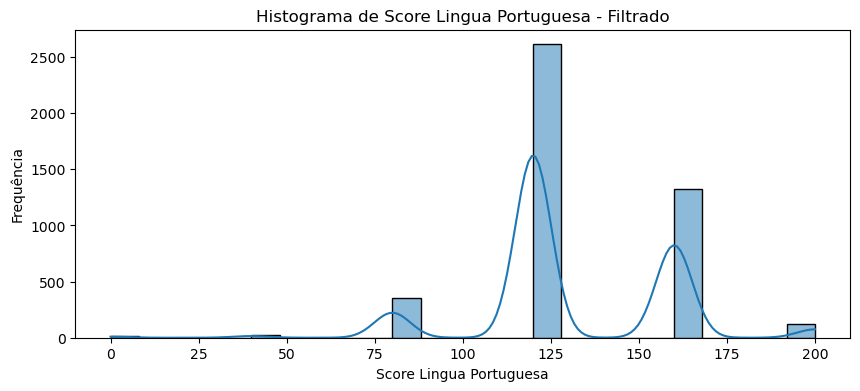

In [95]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_filtrado['LinguaPortuguesa'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Lingua Portuguesa')
plt.ylabel('Frequência')
plt.title('Histograma de Score Lingua Portuguesa - Filtrado')
plt.show()

In [96]:
dataset_filtrado['LinguaPortuguesa'].describe()

count    4456.000000
mean      130.008977
std        27.567282
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: LinguaPortuguesa, dtype: float64

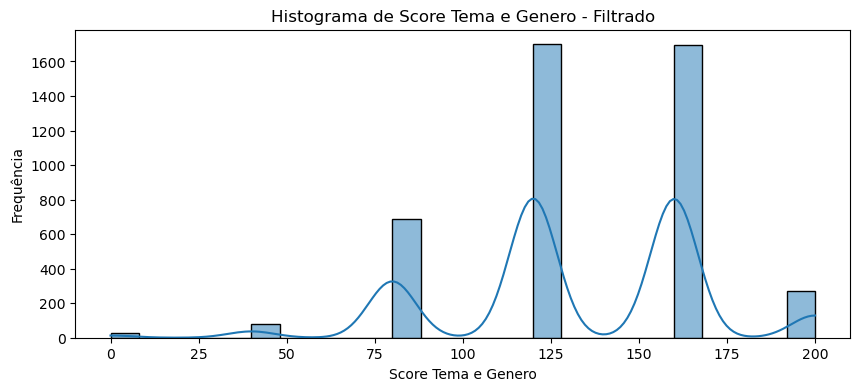

In [97]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_filtrado['TemaGenero'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Tema e Genero')
plt.ylabel('Frequência')
plt.title('Histograma de Score Tema e Genero - Filtrado')
plt.show()

In [98]:
dataset_filtrado['TemaGenero'].describe()

count    4456.000000
mean      131.786355
std        36.107399
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: TemaGenero, dtype: float64

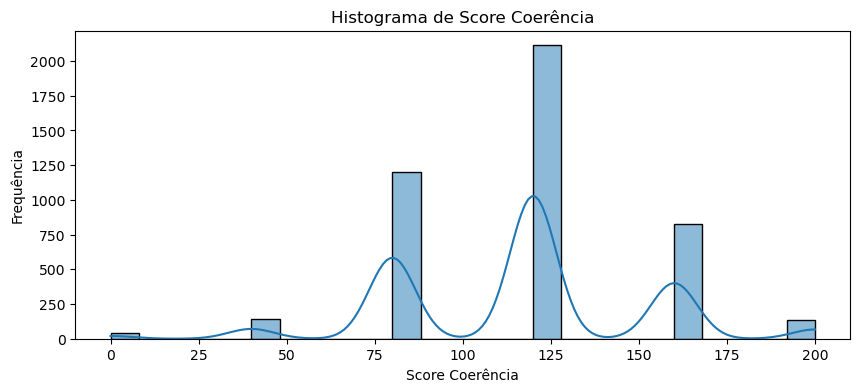

In [99]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_filtrado['Coerencia'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Coerência')
plt.ylabel('Frequência')
plt.title('Histograma de Score Coerência')
plt.show()

In [100]:
dataset_filtrado['Coerencia'].describe()

count    4456.000000
mean      115.412926
std        35.202286
min         0.000000
25%        80.000000
50%       120.000000
75%       120.000000
max       200.000000
Name: Coerencia, dtype: float64

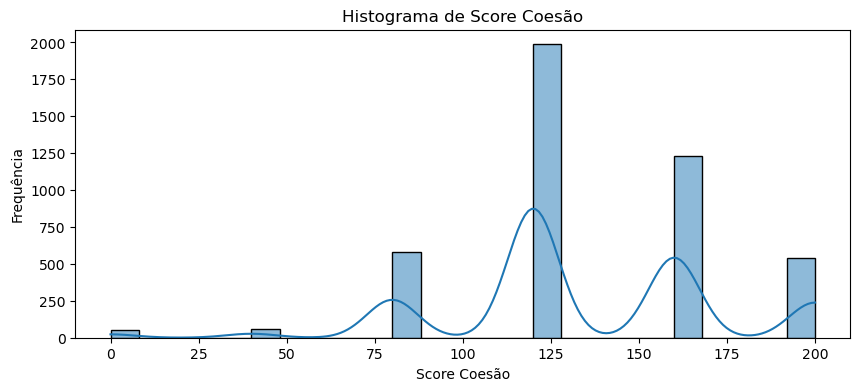

In [101]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_filtrado['Coesao'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Coesão')
plt.ylabel('Frequência')
plt.title('Histograma de Score Coesão')
plt.show()

In [102]:
dataset_filtrado['Coesao'].describe()

count    4456.000000
mean      133.043088
std        38.917841
min         0.000000
25%       120.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: Coesao, dtype: float64

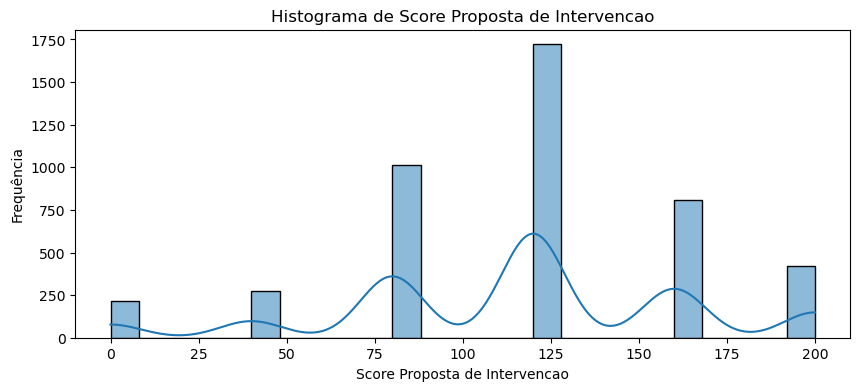

In [103]:
plt.figure(figsize=(10, 4))

# Criar o histograma
sns.histplot(dataset_filtrado['PropostaIntervencao'], bins=25, kde=True)

# Exibir o gráfico
plt.xlabel('Score Proposta de Intervencao')
plt.ylabel('Frequência')
plt.title('Histograma de Score Proposta de Intervencao')
plt.show()

In [104]:
dataset_filtrado['PropostaIntervencao'].describe()

count    4456.000000
mean      114.883303
std        48.260747
min         0.000000
25%        80.000000
50%       120.000000
75%       160.000000
max       200.000000
Name: PropostaIntervencao, dtype: float64

In [105]:
# Porque temos redações com notas 0? Vamos analizar esses registros

In [106]:
df_zeros = dataset_completo.query('score == 0')

In [107]:
df_zeros.head(5)

,prompt,title,essay,competence,score,Total_Caracteres,LinguaPortuguesa,TemaGenero,Coerencia,Coesao,PropostaIntervencao,Total_Caracteres_Titulo,Quantidade_Palavras,Quantidade_Palavras_Titulo
4,4,Comenta-se que o ex-presidente Lula,'Comenta-se que o ex presidente Lula ex-presid...,"[0, 0, 0, 0, 0]",0,1309,0,0,0,0,0,35,209,5
9,6,"Amazonas, um bem de todos nós","'Amazonas, sem ela ele os dias do brasil Brasi...","[0, 0, 0, 0, 0]",0,854,0,0,0,0,0,29,147,6
13,42,Comprometimento Escolar e Individual,'Eu acredito que os dois são muito importantes...,"[0, 0, 0, 0, 0]",0,891,0,0,0,0,0,36,129,4
35,4,Assunto que repercute de forma constante,'Assunto que repercute de forma constante nos ...,"[0, 0, 0, 0, 0]",0,1538,0,0,0,0,0,40,256,6
56,2,União entre o órgão público e a opinião pública,'O supremo tribunal federal Supremo Tribunal F...,"[0, 0, 0, 0, 0]",0,1331,0,0,0,0,0,47,204,9


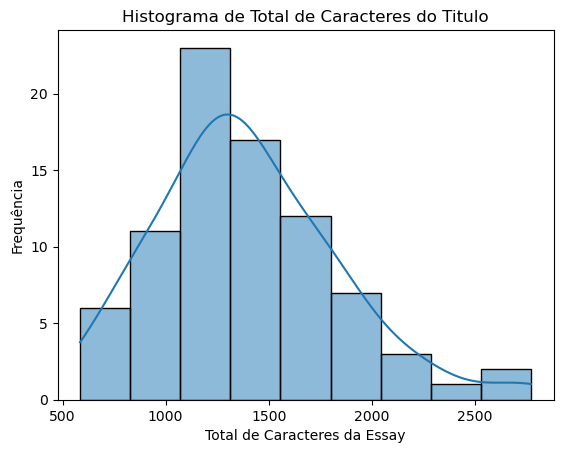

In [108]:
# Criar o histograma
sns.histplot(df_zeros.Total_Caracteres, kde=True)

# Exibir o gráfico
plt.xlabel('Total de Caracteres da Essay')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Caracteres do Titulo')
plt.show()

Aparentemente a ausencia do score não é devido a baixa quantidade de caracteres

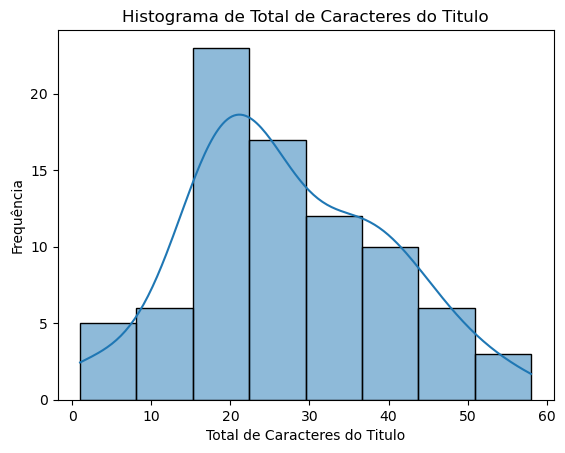

In [109]:
# Criar o histograma
sns.histplot(df_zeros.Total_Caracteres_Titulo, kde=True)

# Exibir o gráfico
plt.xlabel('Total de Caracteres do Titulo')
plt.ylabel('Frequência')
plt.title('Histograma de Total de Caracteres do Titulo')
plt.show()

Enem a ausencia do score é devido a falta de titulo.

### Pendências

#### Verificar com a área de negócio:
- É necessário conversar com a area de negocio para verificar porque existem observações com scores 0. Temos que tira-las do nosso dataset para treinar o modelo e podemos usa-las como novos dados, para testar o modelo;
- As notas 0 são porque houve desvio de coerência com o tema prosposto?
- É obrigatório ter título?
- o Título influencia na nota? Devemos utiliza-los para treinar o nosso modelo?
- O dataset 'prompt' são os textos de apoios? Devemos utiliza-los como contextualização para as essays;
- As variaveis de competencias, são dependentes uma da outra?

### Considerações das análises
- Estatisticamente, há uma correlação entre a quantidade de palavras e o score (Correlação não implica causalidade);
- Estatisticamente, há uma correlação entre a quantidade de caracteres e o score (Correlação não implica causalidade);
- Estatisticamente, há correlação entre as competencias e o score, o que faz sentido, as alteração nas competencias alteram o score final;
- Estatisticamente, há correlação forte entre as competencias. Por exemplo, se a pessoa que tem um nota elevada em Lingua Portuguesa, provavelmente terá um nota alta em Coesao, ou vice-versa;
- A média do Score é de 614 pontos, com um desvio padrão de 177 | Sem os scores 0 e outliers a média é de de 631 pontos, com um desvio padrão de 150;
- A média de Caracteres da redação é de 1842 caracteres, com um desvio padrão de 533 | Sem os scores 0 e outliers a média é de de 1858 pontos, com um desvio padrão de 528;
- A média de Língua Portuguesa da redação é de 128 pontos, com um desvio padrão de 32 | Sem os scores 0 e outliers a média é de de 131 pontos, com um desvio padrão de 26;
- A média de Tema e Gênero da redação é de 129 pontos, com um desvio padrão de 40 | Sem os scores 0 e outliers a média é de de 133 pontos, com um desvio padrão de 35;
- A média de Coerência da redação é de 113 pontos, com um desvio padrão de 38 | Sem os scores 0 e outliers a média é de de 116 pontos, com um desvio padrão de 34;
- A média de Coesão da redação é de 131 pontos, com um desvio padrão de 42 | Sem os scores 0 e outliers a média é de de 134 pontos, com um desvio padrão de 37;
- A média de Proposta de Intervenção da redação é de 113 pontos, com um desvio padrão de 50 | Sem os scores 0 e outliers a média é de de 116 pontos, com um desvio padrão de 47;

# Plano de Ação

Existem duas posibilidades para a solução.

### Possibilidade 1:
A primeira e mais simples opção seria utilizar os modelos LLama-3 (gratuito) ou o GPT (pago) com Python, automatizando a análise para atribuição das notas das competências e fornecimento de feedback para o aluno. No entanto, essa abordagem pode resultar em uma avaliação um tanto genérica, pois não sabemos exatamente quais tipos de textos foram utilizados no treinamento dos modelos, nem se esses textos foram elaborados por profissionais qualificados.

Para implementar essa solução, seria necessário realizar engenharia de prompt. Nesse processo, incluiríamos os textos de apoio com a seguinte solicitação: "Você é um professor corrigindo uma redação do ENEM. Considerando os textos de apoio 'Texto 1... Texto 2...', faça a análise da redação e forneça uma nota de 0 a 200 para as competências de Língua Portuguesa, Tema e Gênero, entre outras, e forneça um feedback em português (Brasil)." Em seguida, no script, inseriríamos a redação do aluno para que o modelo realize a análise e forneça o resultado.

#### Pontos Positivos:
- Implementação rápida;
- Baixa complexidade na implementação do código;
- Modelos treinados com bilhões de parâmetros;
- Não é necessário realizar treinamento adicional;
- Economia de tempo.

#### Pontos Negativos:
- A análise e o feedback podem ser genéricos;
- Falta de transparência sobre os dados usados no treinamento dos modelos;
- Acurácia do modelo pode não ser tão alta;
- Modelo com parametrização limitada.

### Possibilidade 2:
Construção do modelo do 0.

Com os dados já disponíveis, incluindo as notas das competências, os arquivos de contextualização e os textos das redações devidamente separados, podemos seguir com a construção, treinamento, validação e teste do modelo. O modelo será desenvolvido com base em Deep Learning, uma abordagem flexível que permite diferentes formas de implementação.

#### Vamos seguir os passos:
1. #### Preparação dos dados:
   - A primeira etapa é o pré-processamento dos textos, que inclui os seguintes passos:
       - Tokenização: Divisão do texto em unidades menores (tokens);
       - Remoção de stop words e pontuação: Eliminação de palavras irrelevantes e sinais de pontuação;
       - Conversão para minúsculas: Para evitar que a mesma palavra em maiúsculas e minúsculas seja tratada de forma diferente;
       - Lematização: Redução das palavras para suas formas base ou raiz.
   - Em seguida, precisamos decidir qual arquitetura Transformer utilizar. Podemos optar por construir um modelo Seq2Seq do zero usando PyTorch, ou podemos recorrer a um modelo pré-treinado, que já foi capacitado a detectar o contexto das palavras, permitindo representações contextuais mais precisas. Ambas as abordagens são válidas, cada uma com suas vantagens e desvantagens. Por exemplo, modelos como BERT, GPT, T5, entre outros, são opções populares de modelos pré-treinados que oferecem diferentes benefícios dependendo da aplicação.

2. #### Arquitetura:
   - Existem duas abordagens possíveis para a arquitetura do modelo:
       - Desenvolver um modelo que analisa e prevê cada competência individualmente, o que demandaria um uso maior de recursos computacionais e mais tempo de processamento;
       - Um modelo que realiza as previsões das cinco competências simultaneamente. Essa abordagem é mais eficiente, pois executa todas as previsões em uma única passada pelo modelo, economizando recursos e tempo de treinamento.
       - Nesta etapa, realizamos o embedding dos textos, configuramos a camada do Transformer, ajustamos as heads para cada uma das competências (notas) e configuramos a geração do feedback.
   
3. #### Treinamento do Modelo:
   - Para o treinamento, podemos utilizar a técnica de transfer learning caso optemos por usar um modelo pré-treinado. Nesse caso, ajustamos o modelo para os nossos dados específicos. Alternativamente, podemos treinar o modelo do zero utilizando a função 'pura' que desenvolvemos, ajustando-a diretamente aos nossos dados;
   - O modelo será treinado com três conjuntos de dados: treinamento, validação e teste;
   - A função de perda utilizada será o Mean Squared Error (MSE).

4. #### Avaliação:
   - Vamos utilizar RMSE e MSE para avaliar o modelo.
   
5. #### Implementação:
   - A implementação será feita em Python, utilizando as bibliotecas PyTorch e Transformers. Essas ferramentas oferecem suporte robusto para trabalhar com modelos de linguagem pré-treinados e facilitarão o desenvolvimento do nosso modelo de Deep Learning.

#### Pontos Positivos:
- Maior controle sobre as etapas de desenvolvimento e personalização do modelo;
- Modelo ajustado para a tarefa específica, resultando em melhor desempenho para a nossa aplicação;
- Melhor desempenho em produção, devido à otimização e personalização do modelo.

#### Pontos Negativos:
- Tempo elevado de implementação, devido ao processo de construção do modelo e ajuste fino (fine-tuning);
- Maior exigência computacional.

In [110]:
dataset_filtrado.head(5)

,prompt,title,essay,competence,score,Total_Caracteres,LinguaPortuguesa,TemaGenero,Coerencia,Coesao,PropostaIntervencao,Total_Caracteres_Titulo,Quantidade_Palavras,Quantidade_Palavras_Titulo
0,21,A greve dos caminhoneiros e a malha ferroviária,'A grande importância dos caminhoneiros para o...,"[160, 160, 120, 120, 120]",680,2216,160,160,120,120,120,47,341,8
1,23,"Vossa excelência Senador M. M.,",'O senhor e eu já estamos cientes do projeto d...,"[160, 160, 120, 120, 120]",680,1449,160,160,120,120,120,32,233,6
2,39,A validade do impeachment,'É de conhecimento geral dos brasileiros o quã...,"[120, 160, 160, 160, 120]",720,2595,120,160,160,160,120,25,409,4
3,26,Podemos perceber que a sociedade brasileira,'Podemos perceber que a sociedade brasileira e...,"[120, 120, 80, 120, 120]",560,1417,120,120,80,120,120,43,207,6
5,25,Procura-se tolerância,'É notório como notícias envolvendo o homossex...,"[80, 80, 80, 80, 0]",320,2276,80,80,80,80,0,21,357,2


### Exemplo de implementação
(Isso não é um modelo completo, é apenas um resumo do que pode ser feito, aqui estamos deixando de lado a limpeza dos textos e um feedback mais personalizado).

In [111]:
train['essay'] = train['essay'].apply(lambda x: x.replace("[",""))
train['essay'] = train['essay'].apply(lambda x: x.replace("]",""))

valid['essay'] = valid['essay'].apply(lambda x: x.replace("[",""))
valid['essay'] = valid['essay'].apply(lambda x: x.replace("]",""))

test['essay'] = test['essay'].apply(lambda x: x.replace("[",""))
test['essay'] = test['essay'].apply(lambda x: x.replace("]",""))


In [112]:
contextualizacao['description'] = contextualizacao['description'].apply(lambda x: x.replace("[",""))
contextualizacao['description'] = contextualizacao['description'].apply(lambda x: x.replace("]",""))

In [113]:
contextualizacao.columns = ['prompt','contextualizacao']

In [114]:
dataset_filtrado = pd.merge(dataset_filtrado, contextualizacao, on='prompt', how='inner')

In [115]:
import torch
from torch import nn
from transformers import AlbertForSequenceClassification, AlbertTokenizer # Mais leve que o BERT
#from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings

# Suprimir todos os warnings
warnings.filterwarnings("ignore")

In [116]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [117]:
torch.cuda.is_available()

True

In [118]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [119]:
dfd = dataset_filtrado.sample(50)

In [120]:
contexto = dfd.contextualizacao.to_list()

In [121]:
essay = dfd.essay.to_list()

In [122]:
# Concatenar contexto e redação
#input_text = f"Contexto: {contexto}\nRedação: {essay}\n"

# Concatenar as listas pelo índice
input_text = [f"Contexto: {x}\nRedação:{y}\n" for x, y in zip(contexto, essay)]


In [123]:
input_text

['Contexto: "Um dos principais objetivos da nova proposta para o ensino médio é atrair e manter os jovens para a escola. Atualmente, mais de 1 milhão de jovens de 17 anos que deveriam estar no terceiro ano do ensino médio estão fora da escola. Outros 1,7 milhão de jovens não estudam nem trabalham. O resultado mais recente do Índice de Desenvolvimento da Educação Básica (Ideb) também mostra a defasagem do formato atual do ensino médio brasileiro. O último levantamento realizado mostrou que o País está estagnado." Brasil.gov\n"Acadêmicos, cientistas e pesquisadores pedem cautela na unificação das 13 disciplinas do ensino médio público nacional em quatro grandes áreas do conhecimento - anunciada recentemente pelo Ministério da Educação (MEC). Pela proposta, prevista para vigorar a partir do próximo ano, as disciplinas serão integradas em ciências humanas, ciências da natureza, linguagem e matemática. Temendo eventuais frustrações, a maioria dos especialistas, ouvidos pelo Jornal da Ciênci

In [124]:
# Tokenizar o texto concatenado
#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Pode ser BERT, BART ou outro modelo
#inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)

In [125]:
competency_scores = dfd.competence.to_list()

In [126]:
competency_scores

[['80', '80', '80', '80', '80'],
 ['120', '160', '80', '120', '80'],
 ['120', '120', '80', '120', '0'],
 ['160', '160', '200', '120', '200'],
 ['120', '120', '80', '120', '120'],
 ['120', '120', '80', '120', '80'],
 ['120', '80', '80', '80', '0'],
 ['120', '160', '120', '120', '120'],
 ['120', '120', '120', '120', '120'],
 ['120', '80', '80', '120', '80'],
 ['120', '120', '120', '160', '120'],
 ['120', '120', '120', '120', '0'],
 ['120', '120', '120', '120', '120'],
 ['120', '120', '120', '120', '120'],
 ['120', '120', '120', '120', '120'],
 ['160', '200', '160', '200', '160'],
 ['80', '40', '80', '80', '40'],
 ['120', '120', '80', '120', '120'],
 ['120', '120', '80', '120', '80'],
 ['120', '200', '160', '160', '160'],
 ['160', '160', '120', '160', '160'],
 ['160', '120', '120', '120', '120'],
 ['120', '160', '120', '160', '120'],
 ['120', '120', '120', '160', '120'],
 ['120', '120', '120', '120', '120'],
 ['120', '120', '80', '120', '80'],
 ['120', '120', '80', '120', '40'],
 ['160', 

In [127]:
# Converter a lista de listas de strings para um array numpy de int64
array_int64 = np.array(competency_scores, dtype=np.int64)

competency_scores = array_int64.tolist()

In [128]:
competency_scores

[[80, 80, 80, 80, 80],
 [120, 160, 80, 120, 80],
 [120, 120, 80, 120, 0],
 [160, 160, 200, 120, 200],
 [120, 120, 80, 120, 120],
 [120, 120, 80, 120, 80],
 [120, 80, 80, 80, 0],
 [120, 160, 120, 120, 120],
 [120, 120, 120, 120, 120],
 [120, 80, 80, 120, 80],
 [120, 120, 120, 160, 120],
 [120, 120, 120, 120, 0],
 [120, 120, 120, 120, 120],
 [120, 120, 120, 120, 120],
 [120, 120, 120, 120, 120],
 [160, 200, 160, 200, 160],
 [80, 40, 80, 80, 40],
 [120, 120, 80, 120, 120],
 [120, 120, 80, 120, 80],
 [120, 200, 160, 160, 160],
 [160, 160, 120, 160, 160],
 [160, 120, 120, 120, 120],
 [120, 160, 120, 160, 120],
 [120, 120, 120, 160, 120],
 [120, 120, 120, 120, 120],
 [120, 120, 80, 120, 80],
 [120, 120, 80, 120, 40],
 [160, 160, 120, 160, 160],
 [160, 160, 120, 160, 120],
 [120, 160, 120, 120, 120],
 [120, 120, 120, 120, 120],
 [120, 120, 80, 120, 80],
 [120, 160, 120, 120, 120],
 [120, 80, 80, 80, 80],
 [160, 160, 120, 160, 160],
 [160, 200, 160, 160, 160],
 [120, 80, 80, 120, 0],
 [160, 12

In [129]:
# Configurações
#model_name = "bert-base-uncased"  # Utilize o BERT em inglês, mas você pode usar um modelo em português
model_name = "albert-base-v2"
num_competencies = 5  # Número de competências (Língua Portuguesa, Tema e Gênero, Coerência, Coesão)
max_length = 512

In [130]:
# Carregar o tokenizer do BERT
tokenizer = AlbertTokenizer.from_pretrained(model_name)

# Função para pré-processar o texto (tokenizar)
def preprocess_data(texts, tokenizer, max_length=512):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    return inputs['input_ids'], inputs['attention_mask']

In [131]:
# Pré-processamento dos dados
input_ids, attention_masks = preprocess_data(input_text, tokenizer, max_length)

In [132]:
# Converter para tensores do PyTorch
input_ids = torch.tensor(input_ids)
attention_masks = torch.tensor(attention_masks)
competency_scores = torch.tensor(competency_scores, dtype=torch.float32)

In [133]:
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)
competency_scores = competency_scores.to(device)

In [134]:
# Divisão dos dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, competency_scores, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
train_attention, val_attention = train_test_split(attention_masks, test_size=0.4, random_state=42)
val_attention, test_attention = train_test_split(val_attention, test_size=0.5, random_state=42)

In [135]:
# Construção do modelo
class EssayCorrectionModel(nn.Module):
    def __init__(self, model_name, num_competencies):
        super(EssayCorrectionModel, self).__init__()
        # Carregar o modelo BERT com a configuração 'output_attentions=True'
        self.bert = AlbertForSequenceClassification.from_pretrained(
            model_name, num_labels=num_competencies, output_attentions=True
        )
        
    def forward(self, input_ids, attention_mask):
        # Passa os dados pelo BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.logits, outputs.attentions  # Retorna os logits e as atenções

In [136]:
# Instanciando o modelo
model = EssayCorrectionModel(model_name=model_name, num_competencies=num_competencies).to(device)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model 

In [137]:
# Configurando o otimizador e a função de perda
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
criterion = nn.MSELoss()

In [138]:
# Função de treinamento
def train(model, train_data, train_labels, train_attention, val_data, val_labels, val_attention, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        model.eval()  # Coloca o modelo em modo de avaliação para evitar overfitting
        for i in range(len(train_data)):
            optimizer.zero_grad()
            outputs, _ = model(train_data[i:i+1], train_attention[i:i+1])  # Usar batch size = 1
            loss = criterion(outputs, train_labels[i:i+1])  # Função de perda MSE (regressão)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch + 1}/{epochs}, Loss (Train): {total_loss / len(train_data)}")

        # Avaliar o desempenho no conjunto de validação após cada época
        model.eval()  # Coloca o modelo em modo de avaliação
        with torch.no_grad():
            val_outputs, _ = model(val_data, val_attention)
            val_labels = val_labels.cpu()
            val_outputs = val_outputs.cpu()
            val_loss = mean_squared_error(val_labels.numpy(), val_outputs.numpy())
            print(f"Validation Loss after Epoch {epoch + 1}: {val_loss}")
            
            # Aqui você pode adicionar lógica para salvar o melhor modelo
            if epoch == 0 or val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = model.state_dict()  # Armazenar os melhores pesos
        
        torch.cuda.empty_cache()  # Liberar memória não utilizada

    # Carregar os melhores pesos após o treinamento
    model.load_state_dict(best_model_state)

In [139]:
# Função de avaliação
def evaluate(model, test_data, test_labels, test_attention):
    model.eval()
    with torch.no_grad():
        predictions = []
        for i in range(len(test_data)):
            outputs, _ = model(test_data[i:i+1], test_attention[i:i+1])
            outputs = outputs.cpu().numpy() 
            predictions.append(outputs)
        
        predictions = np.concatenate(predictions, axis=0)
        test_labels = test_labels.cpu()
        mse = mean_squared_error(test_labels, predictions)
        rmse = np.sqrt(mse)
        print(f"Mean Squared Error (Test): {mse}")
        print(f"Root Mean Squared Error (Test): {rmse}")
        return predictions

In [140]:
# Treinamento do modelo
train(model, X_train, y_train, train_attention, X_val, y_val, val_attention, optimizer, criterion, epochs=50)

Epoch 1/50, Loss (Train): 13400.41933186849
Validation Loss after Epoch 1: 15245.5283203125
Epoch 2/50, Loss (Train): 11205.805491129557
Validation Loss after Epoch 2: 12878.0810546875
Epoch 3/50, Loss (Train): 9322.503713989257
Validation Loss after Epoch 3: 10832.0576171875
Epoch 4/50, Loss (Train): 7753.489145914714
Validation Loss after Epoch 4: 9113.259765625
Epoch 5/50, Loss (Train): 6464.335730489095
Validation Loss after Epoch 5: 7676.6748046875
Epoch 6/50, Loss (Train): 5413.612259928385
Validation Loss after Epoch 6: 6483.0556640625
Epoch 7/50, Loss (Train): 4565.282154337565
Validation Loss after Epoch 7: 5497.90625
Epoch 8/50, Loss (Train): 3887.415071105957
Validation Loss after Epoch 8: 4690.3583984375
Epoch 9/50, Loss (Train): 3351.5925710042316
Validation Loss after Epoch 9: 4032.78271484375
Epoch 10/50, Loss (Train): 2932.710212516785
Validation Loss after Epoch 10: 3500.66064453125
Epoch 11/50, Loss (Train): 2608.8761159261066
Validation Loss after Epoch 11: 3072.4916

In [141]:
torch.cuda.empty_cache()

In [142]:
# Avaliação final do modelo
predictions = evaluate(model, X_test, y_test, test_attention)

Mean Squared Error (Test): 1258.956787109375
Root Mean Squared Error (Test): 35.481781005859375


In [148]:
# Gerar Feedback Baseado em Atenção do Modelo
def generate_feedback_with_attention(predictions, true_scores, texts, model, tokenizer):
    
    feedbacks = []
    for i, prediction in enumerate(predictions):
        feedback = []
        # Avaliando as competências e gerando feedbacks
        for j in range(len(prediction)):
            diff = true_scores[i][j] - prediction[j]
            if abs(diff) > 20:
                feedback.append(f"Competência {j+1}: Diferença da nota em {diff:.2f}. Real: {true_scores[i][j]}, Previsto: {prediction[j]:.2f}")
            else:
                feedback.append(f"Competência {j+1}: Boa performance. Real: {true_scores[i][j]}, Previsto: {prediction[j]:.2f}")
        
        # Analisando a atenção do modelo
        inputs = tokenizer(texts[i], return_tensors="pt", truncation=True, padding=True, max_length=2500)
        outputs, attentions = model(inputs['input_ids'], inputs['attention_mask'])

        # Exemplo simples de feedback com base na atenção
        attention_weights = attentions[-1].detach().numpy()  # Atenção da última camada
        
        
        feedbacks.append(feedback)
    return feedbacks

In [149]:
#Selecionando um exemplo
input_text[5]

"Contexto: A fome é a situação na qual a alimentação que o indivíduo consome não é suficiente para o gasto energético das atividades básicas diárias. Em muitos casos de pobreza extrema, uma pessoa fica dias sem ter o que comer ou ingere pouca quantidade de alimento. Pode ser comprovada pela relação peso e altura em um indivíduo cujo Índice de massa Corporal (IMC) esteja abaixo de 18%.\xa0Brasil Escola Leia o texto na íntegra\n\nFalta dinheiro, comida e garantias. Em Fortaleza, pelo menos, 204.177 famílias seguem em situação de extrema pobreza. Isto considerando os registros formais dessa condição, pois essa quantidade refere-se às famílias inscritas junto à Prefeitura no Cadastro Único - mecanismo do Governo Federal que identifica e caracteriza a população de baixa renda para inserção nos programas sociais. Nas famílias extremamente pobres, a renda familiar mensal por pessoa é de apenas R$ 89,00. A permanência da desigualdade de renda tem como efeito privações como a fome, pois a condi

In [150]:
y_test = y_test.cpu()
model = model.cpu()

In [151]:
# Gerar feedback mais completo
feedback = generate_feedback_with_attention(predictions, y_test.numpy(), input_text[5], model, tokenizer)

# Exibir feedbacks detalhados
for i, fb in enumerate(feedback):
    print(f"\nFeedback para Redação {i+1}:")
    for f in fb:
        print(f"- {f}")


Feedback para Redação 1:
- Competência 1: Boa performance. Real: 120.0, Previsto: 122.50
- Competência 2: Boa performance. Real: 120.0, Previsto: 124.03
- Competência 3: Boa performance. Real: 120.0, Previsto: 102.57
- Competência 4: Boa performance. Real: 120.0, Previsto: 123.83
- Competência 5: Diferença da nota em 21.55. Real: 120.0, Previsto: 98.45

Feedback para Redação 2:
- Competência 1: Boa performance. Real: 120.0, Previsto: 122.50
- Competência 2: Diferença da nota em 35.97. Real: 160.0, Previsto: 124.03
- Competência 3: Boa performance. Real: 120.0, Previsto: 102.57
- Competência 4: Diferença da nota em 36.17. Real: 160.0, Previsto: 123.83
- Competência 5: Diferença da nota em 21.55. Real: 120.0, Previsto: 98.45

Feedback para Redação 3:
- Competência 1: Boa performance. Real: 120.0, Previsto: 122.50
- Competência 2: Diferença da nota em -44.03. Real: 80.0, Previsto: 124.03
- Competência 3: Diferença da nota em -22.57. Real: 80.0, Previsto: 102.57
- Competência 4: Diferença

## Conclusão
> O exemplo acima ilustra apenas uma parte do processo; diversas outras etapas são essenciais para obter um modelo de melhor desempenho. Isso inclui a limpeza dos dados (como tokenização, remoção de stopwords, normalização ou stemming), aplicação de fine-tuning durante o treinamento para otimizar os parâmetros, e o uso de modelos pré-treinados para fornecer um feedback mais robusto. Além disso, esses modelos exigem alto poder de processamento, sendo recomendada a utilização de GPU ou processamento distribuído para a execução eficiente dessas tarefas. No meu caso, a GPU disponível possui apenas 4GB de memória, por isso realizei os testes com um número reduzido de 50 amostras. Existem, no entanto, técnicas para otimizar o uso de memória da GPU e permitir o processamento de conjuntos de dados maiores.

In [147]:
%watermark --iversions

watermark   : 2.5.0
scipy       : 1.11.1
transformers: 4.30.0
pandas      : 2.0.0
seaborn     : 0.12.2
matplotlib  : 3.5.2
torch       : 2.5.1+cu121
sklearn     : 1.3.0
numpy       : 1.24.3

